In [1]:
from tensorflow.keras import datasets

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_num, train_nx, train_ny = train_images.shape
d2_train_images  = train_images.reshape((train_num, train_nx*train_ny))
test_num, test_nx, test_ny = test_images.shape
d2_test_images  = test_images.reshape((test_num, test_nx*test_ny))

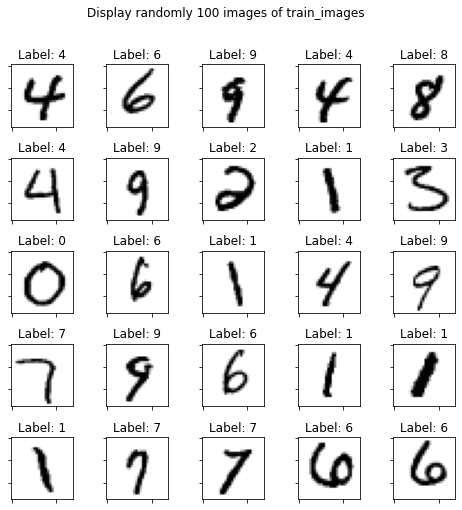

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def displayData(X,Y):
    fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(8,8))
    fig.suptitle( "Display randomly 100 images of train_images")
    for i in range(5):
        for j in range(5):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind,:].reshape(28,28)
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp, cmap='gray_r')
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(train_images,train_labels)    

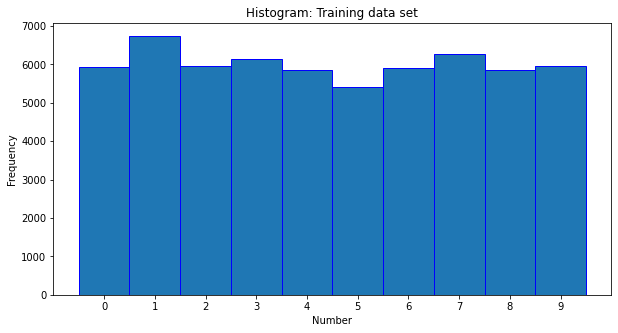

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.hist(train_labels,bins=[0,1,2,3,4,5,6,7,8,9,10], edgecolor="b", histtype="bar",align='left')
ax.set_title('Histogram: Training data set')
ax.set(xlabel='Number', ylabel='Frequency')
ax.xaxis.set_ticks([0,1,2,3,4,5,6,7,8,9]);

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import scipy

clf = MLPClassifier(hidden_layer_sizes=(500,),
                    activation='relu',
                    solver='adam',
                    batch_size=50,
                    random_state=1) 
best_model = clf.fit(d2_train_images/255.0, train_labels)

In [18]:
print('Training Accuracy: {}'.format(best_model.score(d2_train_images, train_labels)))

Training Accuracy: 0.9979


In [17]:
# hidden_layer_size:500
# d2_train_images/255.0
print('Test Accuracy: {}'.format(best_model.score(d2_test_images, test_labels)))

Test Accuracy: 0.9798
